In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs,make_circles

In [22]:
X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)

In [23]:
y[y== 0] = -1

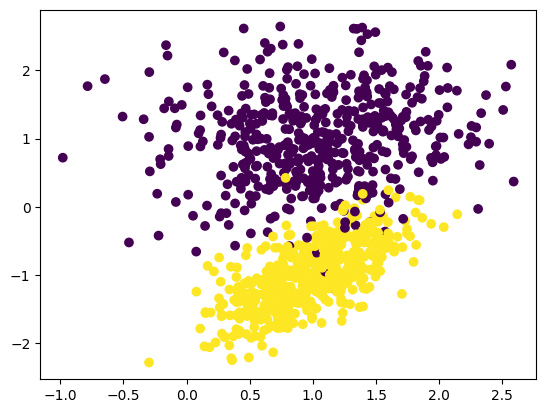

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [25]:
class SVM:
    def __init__(self,C = 1.0,lr = 0.01,epochs = 1000):
        self.C = C
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.th,self.b,self.errorGD = self.gradient_descent(X,y)

    def predict(self,t):
        y_pred = self.th@t.T+self.b
        y_pred[y_pred >= 0] = 1
        y_pred[y_pred < 0] = -1
        return y_pred
    
    def functional_margin(self,X,y,th,b):
        return y*(th@X.T+b)
        
    def hinge_loss(self,X,y,th,b):
        ti = self.functional_margin(X,y,th,b)
        er = 1-ti
        er[er<0] = 0
        return 0.5*th@th+self.C*er.sum()

        # loss = 0.0
        # loss += 0.5*np.dot(w,w.T)
        # m = X.shape[0]
        # for i in range(m):
        #     ti = y[i]*(np.dot(w,X[i].T)+b)
        #     loss += self.C*max(0,1-ti)
        # return loss
    
    def gradient_descent(self,X,y):
        th = np.zeros(X.shape[1])
        b = 0
        errorGD = []
        for i in range(self.epochs+1):
            ti = self.functional_margin(X,y,th,b)
            ti[ti<1] = -1
            ti[ti >= 1] = 0

            gradient = th + self.C*((ti*y)@X)
            th = th - self.lr*gradient

            b = b - self.lr*(self.C*(ti*y).sum())
            errorGD.append(self.hinge_loss(X,y,th,b))
            if i%100 == 0:
                print(f"Epoch: {i+1}, Error: {errorGD[-1]}")

        return th,b,errorGD 

    def accuracy_score(self,y_true,y_pred):
        return (y_true==y_pred).mean()

In [44]:
clf = SVM(C = 0.01,epochs=200)
clf.fit(X,y)

Epoch: 1, Error: 9.00444324356866
Epoch: 101, Error: 2.5272712968138134
Epoch: 201, Error: 2.5081459869986458


In [45]:
clf.accuracy_score(y,clf.predict(X))

np.float64(0.967)

In [46]:
clf.th,clf.b

(array([ 0.23455975, -1.3054045 ]), np.float64(-0.2990000000000001))

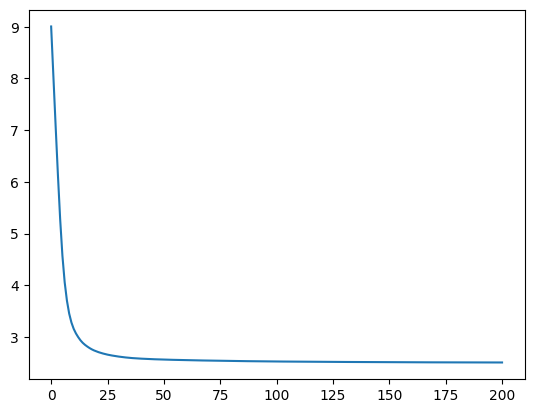

In [47]:
plt.plot(clf.errorGD)
plt.show()

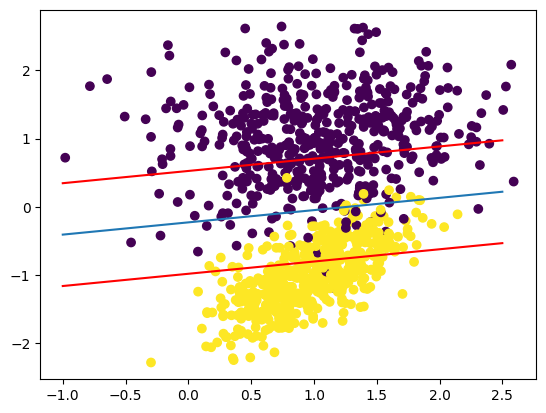

In [48]:
x1 = np.linspace(-1,2.5,100)
x2 = -1*(clf.th[0]*x1+clf.b)/clf.th[1]
plt.plot(x1,x2)
plt.plot(x1,x2+1/np.linalg.norm(clf.th,2),c = 'r')
plt.plot(x1,x2-1/np.linalg.norm(clf.th,2),c = 'r')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()